# What is an oversampled PSF?

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import galsim

In [4]:
#galsim example code (altered a bit to match Euclid)
lam = 800  # nm
diam = 1.2    # meters
lam_over_diam = (lam * 1.e-9) / diam  # radians
lam_over_diam *= 206265  # Convert to arcsec

psf = galsim.OpticalPSF(
    lam_over_diam=lam_over_diam,
    obscuration=.3,
    nstruts=3,
    #gsparams=gsp,
)

In [5]:
euclid_pixel = galsim.Pixel(0.1)

In [7]:
psf_super_image = psf.drawImage(nx=200,ny=200,wcs=galsim.PixelScale(0.1/3),method="auto")

In [8]:
inv_euclid_pixel= galsim.Deconvolve(euclid_pixel)
psf_richard = galsim.Convolve([inv_euclid_pixel,psf])

In [9]:
psf_richard_image = psf.drawImage(nx=200,ny=200,wcs=galsim.PixelScale(0.1/3),method="no_pixel")

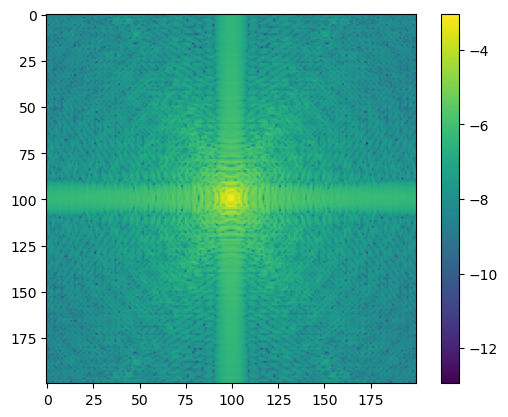

In [14]:
imshow(log10(abs(psf_super_image.array - psf_richard_image.array)));colorbar()

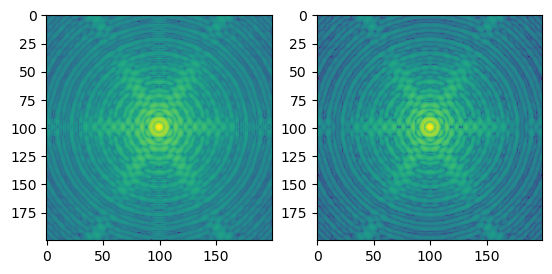

In [13]:
subplot(121)
imshow(log10(abs(psf_super_image.array)))
subplot(122)
imshow(log10(abs(psf_richard_image.array)))
